# Introduction

In this project, we are going to apply the K-Means clustering to solve for the following problems:

- How has the price of rice changed in different regions over time? 
- Which regions experience the most volatile rice prices? 
- Is there an existing seasonal pattern in rice price volatility? 

The [dataset](https://data.humdata.org/dataset/wfp-food-prices-for-philippines), sourced from the World Food Programme Price Database, offers an in-depth look at food prices in the Philippines. Covering key staples such as maize, rice, beans, fish, and sugar, it serves as a valuable tool for analyzing the dynamics of the nation’s food economy.


| **Column Name** | **Description** |
|------------------|-----------------|
| `date`           | The date when the food price was recorded. Helps track trends over time. |
| `admin1`         | The first-level administrative region (e.g., province or region like "Metro Manila"). |
| `admin2`         | The second-level administrative region (e.g., city or municipality within a province). |
| `market`         | The name of the specific market where the price was observed. |
| `latitude`       | Geographic latitude of the market. Useful for mapping and regional analysis. |
| `longitude`      | Geographic longitude of the market. |
| `category`       | Broad classification of the food (e.g., cereals, meats, legumes). |
| `commodity`      | Specific food item being priced (e.g., "Rice (local)", "Sugar", "Tilapia"). |
| `unit`           | The unit of measurement for the price (e.g., "kg", "piece", "liter"). |
| `priceflag`      | Indicates how the price was obtained: `"actual"` (directly recorded) or `"aggregate"` (averaged or estimated). |
| `pricetype`      | Type of market price: typically `"retail"` or `"wholesale"`. |
| `currency`       | Currency in which the price is reported — usually `"Philippine Peso"`. |
| `price`          | The reported price of the commodity in the local currency and unit. |
| `usdprice`       | The same price converted to USD (based on exchange rates at the time). |

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
food_prices_data = pd.read_csv("wfp_food_prices_phl.csv", skiprows=[1])

1 row containing the metadata for each column was skipped when reading the dataset

# Data Cleaning and Exploration

In [2]:
# Number of data and features 
print(food_prices_data.shape)
print(len(str(food_prices_data.shape))*'-')

# Check how many types of data are in the dataset
print(food_prices_data.dtypes.value_counts())
print(len(str(food_prices_data.shape))*'-')

# Check the first 16 columns
food_prices_data.head(16)


(198764, 16)
------------
object     10
float64     4
int64       2
Name: count, dtype: int64
------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Wholesale,PHP,16.35,0.40
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,105.37,2.60
6,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.00,0.47
7,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.00,0.44
8,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
9,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,77.00,1.90


In [3]:
# Check The amount of regions recorded


for region in food_prices_data['admin1'].unique():
    print(region)


print(f"TOTAL REGION: {food_prices_data['admin1'].nunique()}")

National Capital region
Region III
Region IX
Region VI
Region VII
Region XI
Region XII
Autonomous region in Muslim Mindanao
Cordillera Administrative region
Region I
Region II
Region IV-A
Region IV-B
Region V
Region VIII
Region X
Region XIII
TOTAL REGION: 17


### Check for Missing Values

In [4]:
food_prices_data.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

### Check Column Values

In [5]:
commodity_counts = food_prices_data["commodity"].value_counts().reset_index()
commodity_counts.columns = ["commodity", "count"]
print(commodity_counts.to_string(index=False))

                          commodity  count
             Rice (regular, milled)   8781
                        Meat (pork)   7052
                           Tomatoes   6566
                            Carrots   6530
                            Cabbage   6344
      Meat (beef, chops with bones)   6029
              Meat (chicken, whole)   5857
                       Onions (red)   5737
                               Eggs   5638
                   Potatoes (Irish)   5435
                 Rice (well milled)   4838
                          Eggplants   4833
                    Fish (milkfish)   4630
                       Bitter melon   4584
                     Rice (special)   4523
                   Fish (roundscad)   4433
                            Coconut   4338
            Meat (pork, with bones)   4322
                     Fish (tilapia)   4195
                        Meat (beef)   4037
                       Beans (mung)   4035
                  Bananas (lakatan)   3941
           

In [6]:
food_prices_data["currency"].value_counts()

currency
PHP    198764
Name: count, dtype: int64

### Filter Unnecessary Data

In [7]:
food_prices_data = food_prices_data.drop(columns=["category", "currency", "latitude", "longitude"])
food_prices_data.head()

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,Maize flour (yellow),573,KG,actual,Retail,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,16.35,0.40


Since we will only be focusing on rice prices, the category column is unnecessary because we will only have 1 category. Currency will also be removed since all valUes in price column are in PHP

### Change Data Types

Convert price, latitude, and longitude to numbers, and date to datetime format. Invalid entries are safely turned into NaN or NaT using errors="coerce". 

In [8]:
food_prices_data["price"] = pd.to_numeric(food_prices_data["price"], errors="coerce")
# food_prices_data["latitude"] = pd.to_numeric(food_prices_data["latitude"], errors="coerce")
# food_prices_data["longitude"] = pd.to_numeric(food_prices_data["longitude"], errors="coerce")
food_prices_data["date"] = pd.to_datetime(food_prices_data["date"], errors="coerce")

print(food_prices_data.dtypes.value_counts())

object            7
int64             2
float64           2
datetime64[ns]    1
Name: count, dtype: int64


### Filter Rice From Commodities

In [9]:
all_rice_df = food_prices_data[food_prices_data["commodity"].str.startswith("Rice", na=False)]

all_rice_df["commodity"].value_counts()



commodity
Rice (regular, milled)     8781
Rice (well milled)         4838
Rice (special)             4523
Rice (milled, superior)    2850
Rice (paddy)                664
Rice (premium)              620
Name: count, dtype: int64

Since we only need rice commodities, we need to filter out all data that aren't rice

In [10]:
all_rice_df = all_rice_df[(all_rice_df['date'] >= '2018-01-01') & (all_rice_df['date'] <= '2025-12-31')]

all_rice_df.shape

(15734, 12)

All data entries must be between 2018 - 2025

In [11]:
all_rice_df["admin1"].value_counts()


admin1
Region III                              1371
Region VI                               1191
Region V                                1166
Region VIII                             1125
Cordillera Administrative region        1045
Region IV-A                              996
Region XI                                972
Region X                                 965
Region IV-B                              951
Region XIII                              934
Region VII                               816
Region XII                               815
Autonomous region in Muslim Mindanao     812
Region II                                788
Region I                                 781
Region IX                                719
National Capital region                  287
Name: count, dtype: int64

In [12]:
all_rice_df["admin2"].value_counts()


admin2
Davao del Sur        511
Bulacan              370
Zamboanga del Sur    369
Masbate              362
Iloilo               312
                    ... 
Ifugao               134
Sarangani            133
Compostela Valley    130
Sulu                  67
Camarines Sur         18
Name: count, Length: 79, dtype: int64

In [13]:
all_rice_df["market"].value_counts()

market
Metro Manila       287
Davao City         246
Bulacan            185
Pampanga           185
Cagayan            185
                  ... 
Puerto Princesa     27
Calapan City        19
Shariff Aguak       18
Naga City           18
La Trinidad         17
Name: count, Length: 108, dtype: int64

In [14]:
all_rice_df["pricetype"].value_counts()

pricetype
Retail       15325
Wholesale      409
Name: count, dtype: int64

In [15]:
all_rice_df["unit"].value_counts()

unit
KG    15734
Name: count, dtype: int64

In [16]:
all_rice_df["priceflag"].value_counts()

priceflag
actual              15118
aggregate             522
actual,aggregate       94
Name: count, dtype: int64

In [17]:
all_rice_df.head(30)

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
27749,2018-01-15,Autonomous region in Muslim Mindanao,Maguindanao,Shariff Aguak,183,"Rice (regular, milled)",80,KG,actual,Retail,39.20,0.78
27766,2018-01-15,Cordillera Administrative region,Benguet,La Trinidad,168,"Rice (regular, milled)",80,KG,actual,Retail,35.74,0.71
27785,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,42.13,0.84
27786,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,38.11,0.76
27787,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,37.43,0.74
27788,2018-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,38.02,0.76
27803,2018-01-15,Region I,Pangasinan,Lingayen,169,"Rice (regular, milled)",80,KG,actual,Retail,36.76,0.73
27804,2018-01-15,Region I,Pangasinan,Lingayen,169,"Rice (regular, milled)",80,KG,actual,Wholesale,35.00,0.70
27824,2018-01-15,Region II,Cagayan,Tuguegarao City,170,"Rice (regular, milled)",80,KG,actual,Retail,36.86,0.73
27825,2018-01-15,Region II,Cagayan,Tuguegarao City,170,"Rice (regular, milled)",80,KG,actual,Wholesale,36.40,0.72


# Data Analysis

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import calendar

# Problem 2: Which regions experience the most volatile rice prices?

We must calculate the monthly averages for each region, then use standard deviation and coefficient of variation (CV) to determine the volatility of rice prices

In [19]:
# Calculate rice price per month
monthly_rice_price = all_rice_df.copy()
monthly_rice_price["year_month"] = monthly_rice_price["date"].dt.to_period("M")
monthly_avg_by_region = monthly_rice_price.groupby(["year_month", "admin1"])["price"].mean().reset_index()
monthly_avg_by_region['year_month'] = monthly_avg_by_region['year_month'].dt.to_timestamp() 

print(monthly_avg_by_region.head(17))

   year_month                                admin1    price
0  2018-01-01  Autonomous region in Muslim Mindanao  39.2000
1  2018-01-01      Cordillera Administrative region  35.7400
2  2018-01-01               National Capital region  38.9225
3  2018-01-01                              Region I  35.8800
4  2018-01-01                             Region II  36.6300
5  2018-01-01                            Region III  40.0900
6  2018-01-01                           Region IV-A  35.2700
7  2018-01-01                           Region IV-B  32.8850
8  2018-01-01                             Region IX  38.9200
9  2018-01-01                              Region V  37.3050
10 2018-01-01                             Region VI  39.3425
11 2018-01-01                            Region VII  39.1300
12 2018-01-01                           Region VIII  36.9100
13 2018-01-01                              Region X  39.4100
14 2018-01-01                             Region XI  44.2125
15 2018-01-01           

In [20]:
volatility_metrics = {}

In [21]:
def calculate_volatility(group):
    # Standard deviation
    std_dev = group['price'].std()
    
    # Coefficient of Variation (CV) = std_dev / mean
    mean_price = group['price'].mean()
    cv = std_dev / mean_price if mean_price > 0 else 0
    
    # Range (max - min) / mean
    price_range = group['price'].max() - group['price'].min()
    range_ratio = price_range / mean_price if mean_price > 0 else 0
    
    # Return a Series with metrics
    return pd.Series({
        'mean_price': mean_price,
        'std_dev': std_dev,
        'cv': cv, 
        'range_ratio': range_ratio,
        'count': len(group),
        'min_price': group['price'].min(),
        'max_price': group['price'].max()
    })


In [22]:
# Calculate volatility by Region
volatility_by_region = all_rice_df.groupby('admin1').apply(calculate_volatility).reset_index()
volatility_by_region = volatility_by_region.sort_values('cv', ascending=False)
print("Volatility By Region")
print(volatility_by_region.head(17).to_string(index=False))

Volatility By Region
                              admin1  mean_price   std_dev       cv  range_ratio  count  min_price  max_price
                          Region VII   51.342377 14.615917 0.284676     1.770467  816.0      33.60     124.50
Autonomous region in Muslim Mindanao   51.912894 10.058361 0.193755     1.248823  812.0      31.92      96.75
                           Region VI   46.988682  8.726982 0.185725     0.828710 1191.0      28.60      67.54
                          Region III   47.319796  8.426656 0.178079     0.815938 1371.0      32.45      71.06
                         Region IV-B   47.041514  8.096152 0.172107     1.043121  951.0      27.86      76.93
             National Capital region   44.144042  7.549712 0.171024     0.736000  287.0      28.97      61.46
                           Region II   43.867817  7.340263 0.167327     0.722170  788.0      29.20      60.88
    Cordillera Administrative region   46.294268  7.710962 0.166564     0.839845 1045.0      31.83 

C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4352\2586062293.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility_by_region = all_rice_df.groupby('admin1').apply(calculate_volatility).reset_index()


In [23]:
# Calculate volatility by Province
volatility_by_province = all_rice_df.groupby(['admin1', 'admin2']).apply(calculate_volatility).reset_index()
volatility_by_province = volatility_by_province.sort_values('cv', ascending=False)
print("Volatility By Province")
print(volatility_by_province.head(30).to_string(index=False))

Volatility By Province
                              admin1              admin2  mean_price   std_dev       cv  range_ratio  count  min_price  max_price
                          Region VII                Cebu   54.911281 22.204211 0.404365     1.655398  281.0      33.60     124.50
Autonomous region in Muslim Mindanao           Tawi-Tawi   57.245030 15.557617 0.271772     1.132500  165.0      31.92      96.75
                           Region VI             Antique   46.490734  9.432216 0.202884     0.741653  177.0      33.06      67.54
                          Region III              Aurora   48.798011  9.684337 0.198458     0.753104  181.0      34.31      71.06
                           Region VI               Capiz   46.748935  9.264552 0.198177     0.566430  169.0      36.05      62.53
                           Region VI               Aklan   46.394972  8.987408 0.193715     0.725725  179.0      31.74      65.41
                           Region VI              Iloilo   45.82022

C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4352\1652685541.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility_by_province = all_rice_df.groupby(['admin1', 'admin2']).apply(calculate_volatility).reset_index()


Calculate the monthly data for the whole country

In [24]:
monthly_data = all_rice_df.copy()
monthly_data['month'] = monthly_data['date'].dt.month
monthly_data['year'] = monthly_data['date'].dt.year

# Calculate monthly average prices
monthly_avg = monthly_data.groupby(['year', 'month'])['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_avg['cv'] = monthly_avg['std'] / monthly_avg['mean']

# Group by month only to see patterns across years
monthly_pattern = monthly_data.groupby('month')['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_pattern['cv'] = monthly_pattern['std'] / monthly_pattern['mean']
monthly_pattern['month_name'] = monthly_pattern['month'].apply(lambda x: calendar.month_name[x])

print("Monthly Pattern")
print(monthly_pattern[['month_name', 'mean', 'std', 'cv']].to_string(index=False))


Monthly Pattern
month_name      mean      std       cv
   January 47.123604 8.957737 0.190090
  February 47.263353 9.013150 0.190701
     March 47.563089 8.921932 0.187581
     April 46.659990 8.681208 0.186052
       May 46.050931 8.070602 0.175254
      June 46.166480 8.126369 0.176023
      July 46.265895 7.942675 0.171675
    August 46.600127 7.853729 0.168535
 September 47.447005 8.282565 0.174565
   October 46.914407 8.396025 0.178965
  November 46.883848 8.524146 0.181814
  December 47.105909 8.732990 0.185391


In [25]:
# Prepare features for clustering: mean price, std_dev, cv
clustering_features = volatility_by_region[['mean_price', 'std_dev', 'cv']].copy()
print("Clustering Features")
print(clustering_features.head(17).to_string(index=False))

Clustering Features
 mean_price   std_dev       cv
  51.342377 14.615917 0.284676
  51.912894 10.058361 0.193755
  46.988682  8.726982 0.185725
  47.319796  8.426656 0.178079
  47.041514  8.096152 0.172107
  44.144042  7.549712 0.171024
  43.867817  7.340263 0.167327
  46.294268  7.710962 0.166564
  45.935826  7.635446 0.166220
  46.269012  7.536214 0.162878
  46.692333  7.577534 0.162286
  47.370338  7.646327 0.161416
  43.464479  6.841603 0.157407
  46.573575  7.032426 0.150996
  46.642072  6.964978 0.149328
  46.669327  6.910359 0.148071
  45.765193  6.716937 0.146770


In [28]:
all_rice_data = all_rice_df.copy()
all_rice_data['date'] = pd.to_datetime(all_rice_data['date'])
all_rice_data['year_month'] = all_rice_data['date'].dt.to_period('M')

region_ts = (
    all_rice_data
    .groupby(['admin1','year_month'])['price']
    .mean()
    .unstack(level='year_month')
    .fillna(method='ffill', axis=1)   # fill forward any missing months
)

print("Region Time Series")
print(region_ts.head(17).to_string(index=False))

Region Time Series
 2018-01   2018-02   2018-03  2018-04  2018-05  2018-06   2018-07   2018-08   2018-09  2018-10   2018-11   2018-12  2019-01  2019-02   2019-03   2019-04  2019-05  2019-06   2019-07  2019-08   2019-09   2019-10   2019-11  2019-12   2020-01   2020-02   2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11   2020-12   2021-01   2021-02   2021-03   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   2021-10   2021-11   2021-12   2022-01   2022-02   2022-03   2022-04   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10   2022-11   2022-12   2023-01   2023-02   2023-03   2023-04   2023-05   2023-06   2023-07   2023-08   2023-09   2023-10   2023-11   2023-12   2024-01   2024-02   2024-03   2024-04   2024-05   2024-06   2024-07   2024-08   2024-09   2024-10   2024-11   2024-12   2025-01   2025-02   2025-03
 39.2000 39.530000 41.200000  41.3100  42.6000  42.6000 42.600000 43.890000 45.600000  45.6000 44.680000 41.600000  40.6000  40.6000 40.600000

C:\Users\Lyrick\AppData\Local\Temp\ipykernel_4352\3135041293.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', axis=1)   # fill forward any missing months


In [36]:
type_ts = (
    all_rice_data
      .groupby(['commodity','year_month'])['price']
      .mean()
      .unstack()
)

# propagate values both ways across the timeline:
type_ts = type_ts.ffill(axis=1).bfill(axis=1)  

print("Type Time Series")
print(type_ts.head(17).to_string(index=False))

Type Time Series
  2018-01   2018-02   2018-03   2018-04   2018-05   2018-06   2018-07   2018-08   2018-09   2018-10   2018-11   2018-12   2019-01   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   2019-08   2019-09   2019-10   2019-11   2019-12   2020-01   2020-02   2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11   2020-12   2021-01   2021-02   2021-03   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   2021-10   2021-11   2021-12   2022-01   2022-02   2022-03   2022-04   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10   2022-11   2022-12   2023-01   2023-02   2023-03   2023-04   2023-05   2023-06   2023-07   2023-08   2023-09   2023-10   2023-11   2023-12   2024-01   2024-02   2024-03   2024-04   2024-05   2024-06   2024-07   2024-08   2024-09   2024-10   2024-11   2024-12   2025-01   2025-02   2025-03
41.702500 42.540000 43.184000 43.309091 43.807273 43.773333 45.808333 47.289000 47.885000 45.657000 44.298182 43.537273 42.996364 42.

In [37]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [38]:

region_scaled = scaler.fit_transform(region_ts)
type_scaled   = scaler.fit_transform(type_ts)

## JC, ALL CODES BELOW THIS LINE ARE NOT FINALIZED YET, HINDI pa aq sure if goods ba sya kasi based on the sample_images na folder, regions are not complete fsr
### things needed to be fixed but well, atleast we have insights on where to go from na

Utilize KMeans-Clustering using the prepared features (mean price, std dev, coefficient of variation)

In [71]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [72]:
# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, min(10, len(volatility_by_region)))  # Up to 9 clusters or number of regions
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

The Best K should be determined after seeing the plot

In [73]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
volatility_by_region['cluster'] = kmeans.fit_predict(scaled_features)

In [74]:
def plot_time_series():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Select top 5 regions by data point count for better visualization
    top_regions = all_rice_df['admin1'].value_counts().head(5).index.tolist()
    
    for region in top_regions:
        region_data = monthly_avg_by_region[monthly_avg_by_region['admin1'] == region]
        ax.plot(region_data['year_month'], region_data['price'], label=region, alpha=0.7)
    
    # Add a 3-month moving average for the national average
    national_avg = monthly_avg_by_region.groupby('year_month')['price'].mean().reset_index()
    national_avg.set_index('year_month', inplace=True)
    ma_3month = national_avg['price'].rolling(window=3).mean()
    ax.plot(ma_3month.index, ma_3month.values, 'k--', linewidth=2, label='National 3-Month MA')
    
    ax.set_title('Rice Price Trends by Region (2018-2025)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (PHP)')
    ax.legend(title='Region')
    
    # Format x-axis to show only years
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.tight_layout()
    return fig

In [75]:
def plot_volatility_indicators():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Sort regions by coefficient of variation (CV)
    volatility_data = volatility_by_region.sort_values('cv', ascending=False).head(10)
    
    # Create a bar chart of CV values
    bars = ax.bar(volatility_data['admin1'], volatility_data['cv'])
    
    # Color bars by cluster
    for i, bar in enumerate(bars):
        cluster = volatility_data.iloc[i]['cluster']
        bar.set_color(plt.cm.viridis(cluster / 2))
    
    ax.set_title('Rice Price Volatility by Region')
    ax.set_xlabel('Region')
    ax.set_ylabel('Coefficient of Variation (σ/μ)')
    ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')
    
    # Add a horizontal line for the national average CV
    national_cv = all_rice_df.groupby('date')['price'].mean().reset_index()['price'].std() / all_rice_df['price'].mean()
    ax.axhline(y=national_cv, color='r', linestyle='--', label='National Average')
    
    ax.legend()
    plt.tight_layout()
    return fig

In [76]:
def plot_seasonality_heatmap():
    # Create pivot table of monthly prices by year and month
    pivot_data = monthly_avg.pivot(index='month', columns='year', values='mean')
    
    # Calculate percent change from annual average for each year
    for year in pivot_data.columns:
        year_avg = pivot_data[year].mean()
        pivot_data[year] = (pivot_data[year] - year_avg) / year_avg * 100
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Replace month numbers with month names
    pivot_data.index = [calendar.month_abbr[month] for month in pivot_data.index]
    
    sns.heatmap(pivot_data, cmap='RdBu_r', center=0, annot=True, fmt=".1f", ax=ax, 
                cbar_kws={'label': '% Difference from Annual Average'})
    
    ax.set_title('Seasonal Patterns in Rice Prices')
    ax.set_ylabel('Month')
    ax.set_xlabel('Year')
    
    plt.tight_layout()
    return fig

In [77]:
def plot_volatile_vs_stable():
    # Let's use range_ratio as our measure of volatility
    sorted_regions = volatility_by_region.sort_values('range_ratio')
    
    # Get 5 most stable and 5 most volatile regions
    stable_regions = sorted_regions.head(5)
    volatile_regions = sorted_regions.tail(5)
    
    # Combine them in a single DataFrame for plotting
    plot_data = pd.concat([stable_regions, volatile_regions])
    
    # Sort by volatility for the plot
    plot_data = plot_data.sort_values('range_ratio')
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create a bar chart
    bars = ax.barh(plot_data['admin1'], plot_data['range_ratio'])
    
    # Color the bars: green for stable, red for volatile
    for i, bar in enumerate(bars):
        if i < 5:  # Stable regions
            bar.set_color('green')
        else:  # Volatile regions
            bar.set_color('red')
    
    ax.set_title('Most Stable vs Most Volatile Rice Price Regions')
    ax.set_xlabel('Price Range Ratio ((max-min)/mean)')
    ax.set_ylabel('Region')
    
    # Add stability/volatility labels
    ax.text(plot_data['range_ratio'].max() * 0.05, 1, 'STABLE', fontsize=12, color='green')
    ax.text(plot_data['range_ratio'].max() * 0.8, 8, 'VOLATILE', fontsize=12, color='red')
    
    plt.tight_layout()
    return fig

In [78]:
def plot_kpis():
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Calculate KPIs
    current_avg_price = all_rice_df[all_rice_df['date'] == all_rice_df['date'].max()]['price'].mean()
    
    # Calculate year-over-year change
    yearly_avg = all_rice_df.groupby(all_rice_df['date'].dt.year)['price'].mean()
    annual_pct_change = yearly_avg.pct_change().mean() * 100  # average annual % change
    
    # Number of clusters identified
    cluster_count = len(volatility_by_region['cluster'].unique())
    
    # Overall volatility score (national CV)
    overall_cv = all_rice_df['price'].std() / all_rice_df['price'].mean() * 100  # as percentage
    
    # Create a simple text plot with KPIs
    ax.axis('off')
    
    ax.text(0.5, 0.8, 'KEY PERFORMANCE INDICATORS', fontsize=18, ha='center', weight='bold')
    
    ax.text(0.1, 0.6, f'Current Average Rice Price:', fontsize=14)
    ax.text(0.9, 0.6, f'₱{current_avg_price:.2f} per kg', fontsize=14, ha='right')
    
    ax.text(0.1, 0.5, f'Average Annual Price Change:', fontsize=14)
    ax.text(0.9, 0.5, f'{annual_pct_change:.2f}%', fontsize=14, ha='right', 
            color='red' if annual_pct_change > 0 else 'green')
    
    ax.text(0.1, 0.4, f'Overall Price Volatility:', fontsize=14)
    ax.text(0.9, 0.4, f'{overall_cv:.2f}%', fontsize=14, ha='right')
    
    ax.text(0.1, 0.3, f'Identified Market Clusters:', fontsize=14)
    ax.text(0.9, 0.3, f'{cluster_count}', fontsize=14, ha='right')
    
    # Add a box around the KPIs
    box = plt.Rectangle((0.05, 0.25), 0.9, 0.6, fill=False, edgecolor='gray', linewidth=2)
    ax.add_patch(box)
    
    plt.tight_layout()
    return fig

In [ ]:
def plot_elbow_method():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(k_range, inertia, 'bo-')
    ax.set_xlabel('Number of clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k')
    plt.tight_layout()
    return fig

In [ ]:
def generate_analysis_report():
    # Generate all the plots
    time_series_fig = plot_time_series()
    plt.savefig('time_series_plot.png', dpi=300, bbox_inches='tight')
    
    volatility_fig = plot_volatility_indicators()
    plt.savefig('volatility_indicators.png', dpi=300, bbox_inches='tight')
    
    seasonality_fig = plot_seasonality_heatmap()
    plt.savefig('seasonality_heatmap.png', dpi=300, bbox_inches='tight')
    
    volatile_stable_fig = plot_volatile_vs_stable()
    plt.savefig('volatile_vs_stable.png', dpi=300, bbox_inches='tight')
    
    kpis_fig = plot_kpis()
    plt.savefig('kpis.png', dpi=300, bbox_inches='tight')
    
    elbow_fig = plot_elbow_method()
    plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
    
    # Display the top 10 most volatile regions
    print("Top 10 Most Volatile Regions by CV:")
    print(volatility_by_region[['admin1', 'cv', 'mean_price']].head(10))
    
    print("\nSeasonal Patterns (Monthly averages across all years):")
    print(monthly_pattern[['month_name', 'mean', 'cv']])
    
    # Answer our research questions
    print("\nAnswering Research Questions:")
    print("1. How has the price of rice changed in different regions over time?")
    print("   - See the Time-Series Price Chart for visual representation.")
    print("   - National average annual change: {:.2f}%".format(annual_pct_change))
    
    print("\n2. Which regions experience the most volatile rice prices?")
    print("   - Most volatile region: {}".format(volatility_by_region.iloc[0]['admin1']))
    print("   - See Volatility Indicators Chart and Top Volatile vs. Stable Regions charts.")
    
    print("\n3. Is there an existing seasonal pattern in rice price volatility?")
    print("   - See Seasonality Heatmap for visual patterns.")
    
    # Find which months have the highest and lowest prices on average
    highest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmax()]
    lowest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmin()]
    
    print("   - Month with highest average price: {} (₱{:.2f})".format(
        highest_price_month['month_name'], highest_price_month['mean']))
    print("   - Month with lowest average price: {} (₱{:.2f})".format(
        lowest_price_month['month_name'], lowest_price_month['mean']))
    
    # Show clusters and their characteristics
    print("\nCluster Analysis:")
    for cluster in volatility_by_region['cluster'].unique():
        cluster_regions = volatility_by_region[volatility_by_region['cluster'] == cluster]
        print(f"Cluster {cluster}:")
        print(f"  - Number of regions: {len(cluster_regions)}")
        print(f"  - Average CV: {cluster_regions['cv'].mean():.4f}")
        print(f"  - Average price: ₱{cluster_regions['mean_price'].mean():.2f}")
        print(f"  - Regions: {', '.join(cluster_regions['admin1'].head(3).tolist())}...")

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_8108\1314649350.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')


Top 10 Most Volatile Regions by CV:
                                  admin1        cv  mean_price
11                            Region VII  0.284676   51.342377
0   Autonomous region in Muslim Mindanao  0.193755   51.912894
10                             Region VI  0.185725   46.988682
5                             Region III  0.178079   47.319796
7                            Region IV-B  0.172107   47.041514
2                National Capital region  0.171024   44.144042
4                              Region II  0.167327   43.867817
1       Cordillera Administrative region  0.166564   46.294268
3                               Region I  0.166220   45.935826
14                             Region XI  0.162878   46.269012

Seasonal Patterns (Monthly averages across all years):
   month_name       mean        cv
0     January  47.123604  0.190090
1    February  47.263353  0.190701
2       March  47.563089  0.187581
3       April  46.659990  0.186052
4         May  46.050931  0.175254
5    

NameError: name 'annual_pct_change' is not defined

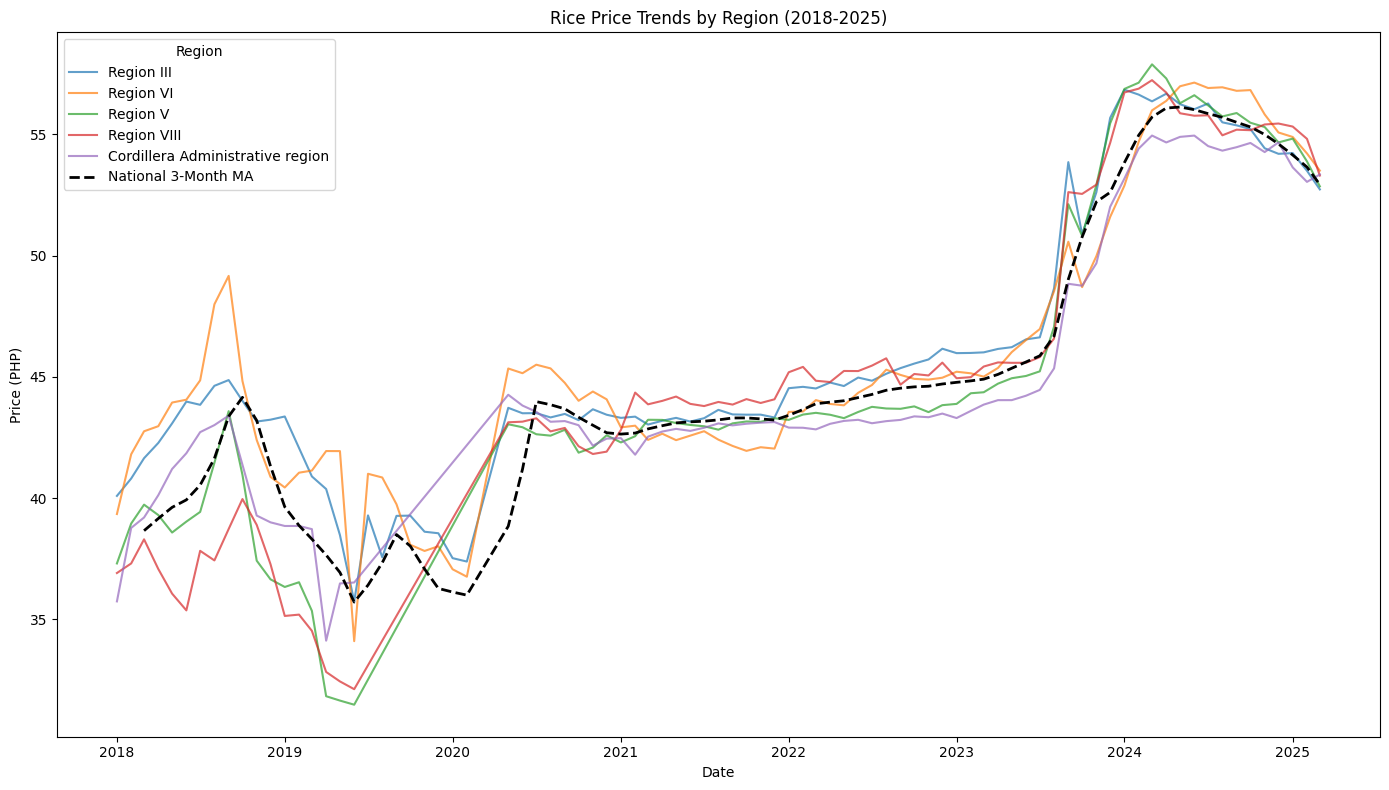

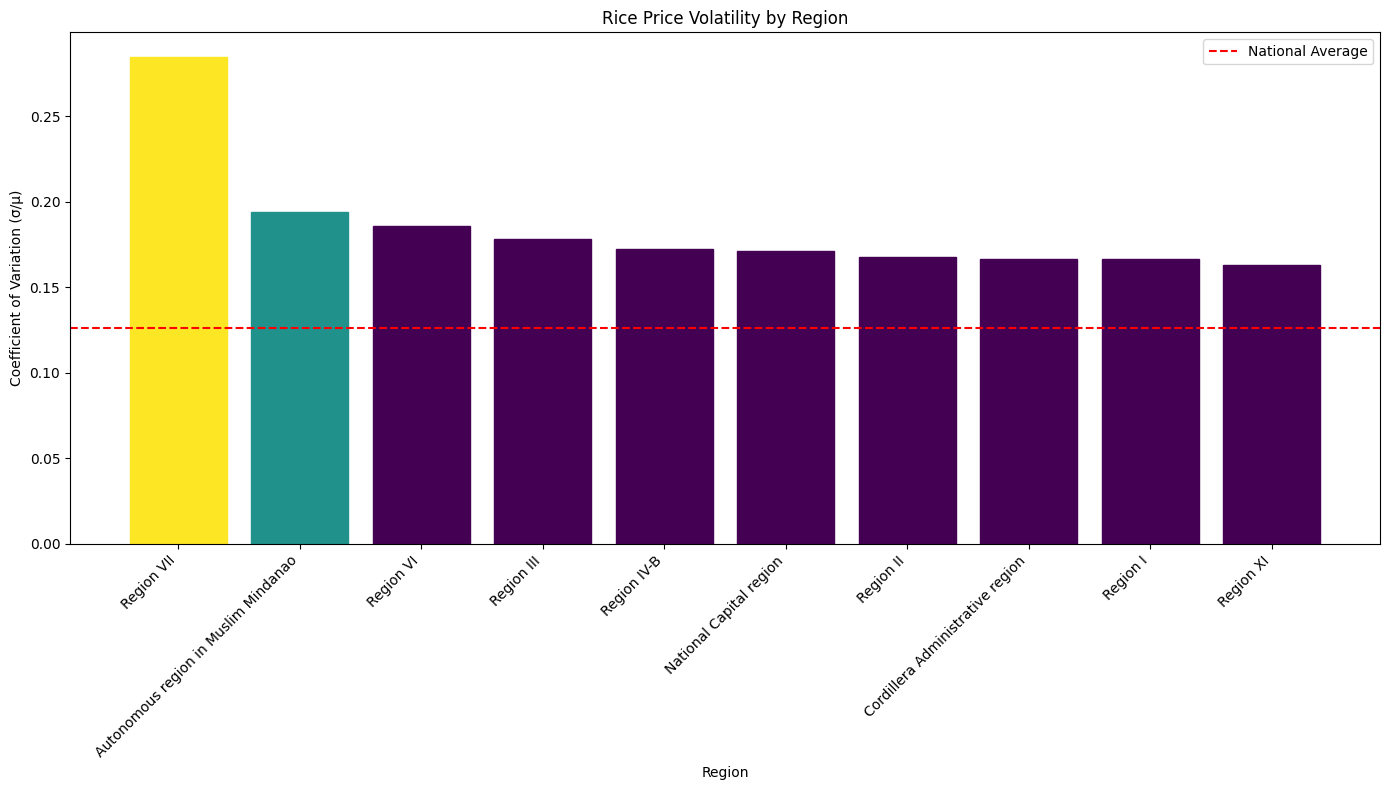

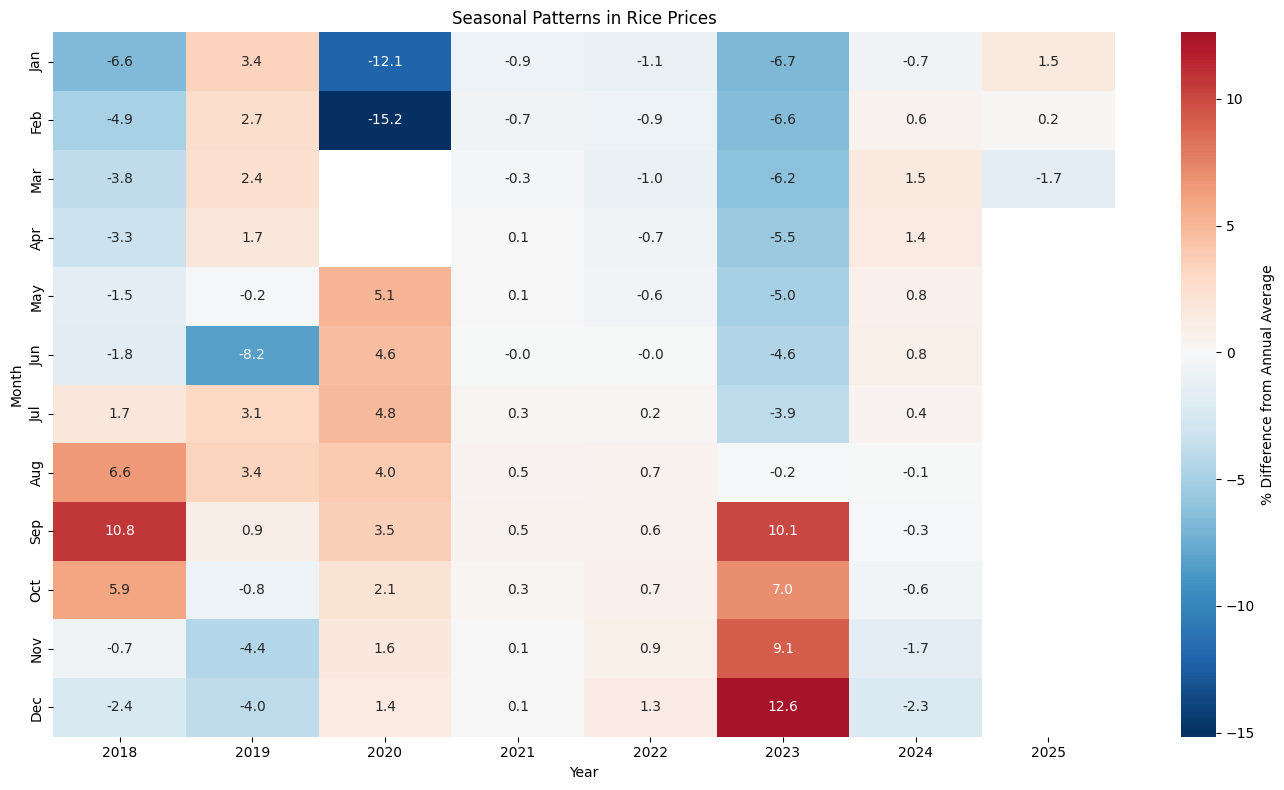

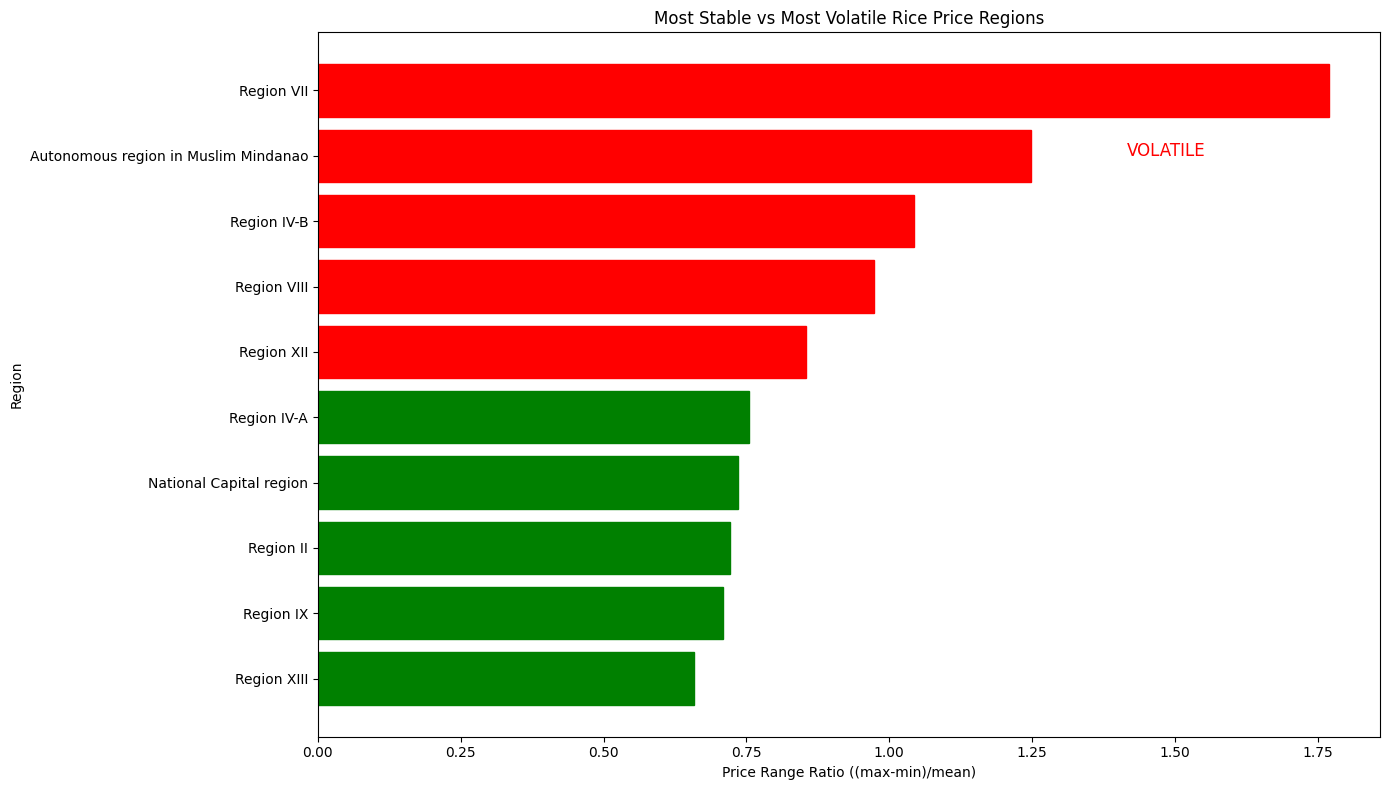

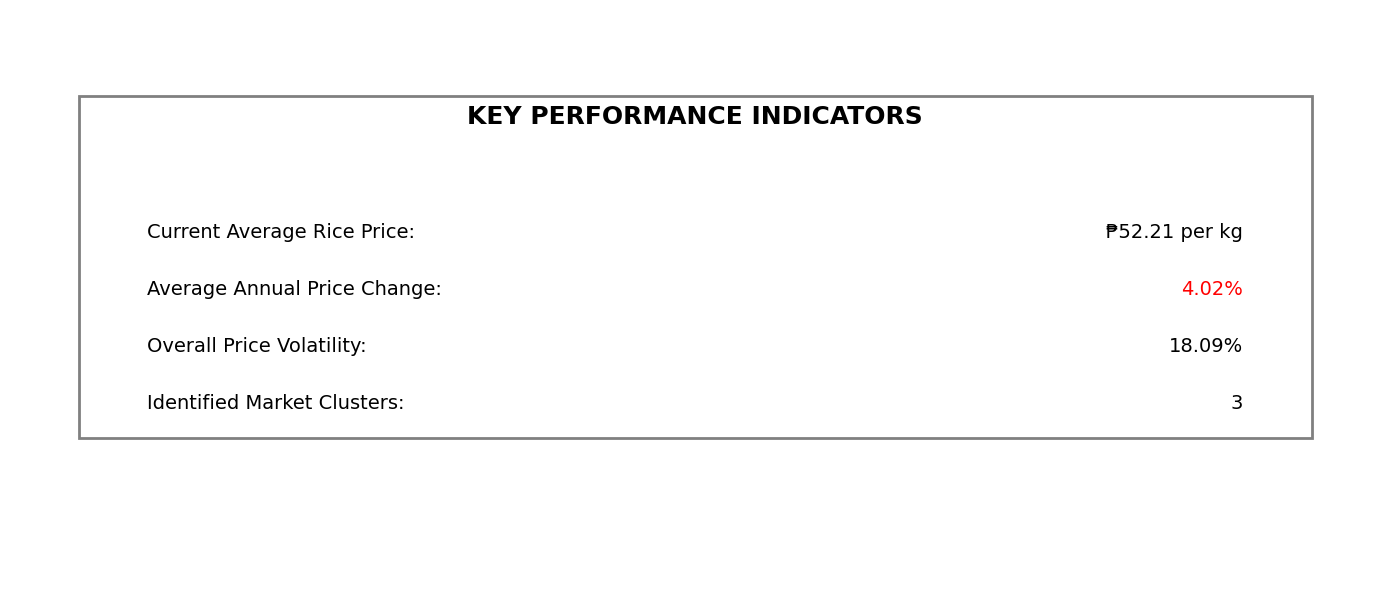

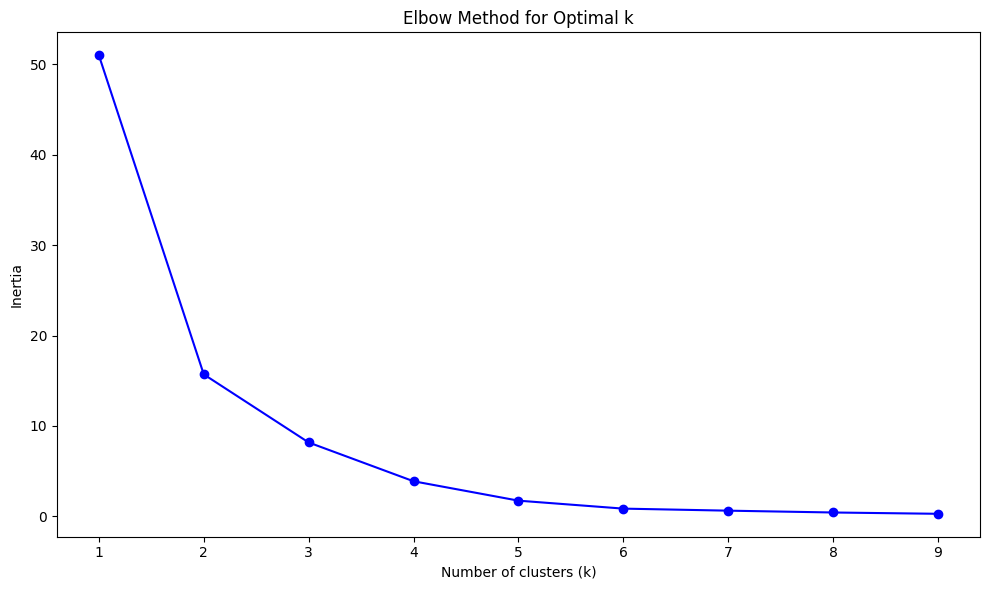

In [ ]:
# Run the analysis
generate_analysis_report()

# Display plots interactively
plt.figure(figsize=(14, 8))
plot_time_series()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatility_indicators()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_seasonality_heatmap()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatile_vs_stable()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plot_kpis()
plt.tight_layout()
plt.show()